In [1]:
using PyPlot

In [2]:
using Interact

  likely near C:\Users\Magy\.julia\v0.4\Interact\src\IJulia/setup.jl:153
  likely near C:\Users\Magy\.julia\v0.4\Interact\src\IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in require at loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading C:\Users\Magy\.julia\v0.4\Interact\src\IJulia\statedict.jl, in expression starting on line 1


In [3]:
using Distributions

INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\ArrayViews.ji for module ArrayViews.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\PDMats.ji for module PDMats.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\Distributions.ji for module Distributions.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\StatsFuns.ji for module StatsFuns.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\StatsBase.ji for module StatsBase.


In [35]:
function Observations(w,n) # w is the actual wight and n is number of observations
    Data = Array(1:n)
    for i=1:n
        if rand() < w
            Data[i]= 1
        else 
            Data[i]= 0 
        end
    end
    return Data
end

Observations (generic function with 2 methods)

In [37]:
Data= Observations(0.25,1)

1-element Array{Int64,1}:
 0

In [38]:
H= [0:0.001:1...] # Hypothesis for the wight of the coin 
    perior= 1;
    
    r= sum(Data)

0

In [39]:
n= length(Data)
    Likelihood= H.^r .* (1 .- H).^(n-r)

1001-element Array{Float64,1}:
 1.0  
 0.999
 0.998
 0.997
 0.996
 0.995
 0.994
 0.993
 0.992
 0.991
 0.99 
 0.989
 0.988
 ⋮    
 0.011
 0.01 
 0.009
 0.008
 0.007
 0.006
 0.005
 0.004
 0.003
 0.002
 0.001
 0.0  

In [40]:
Posterior= Likelihood .* perior

1001-element Array{Float64,1}:
 1.0  
 0.999
 0.998
 0.997
 0.996
 0.995
 0.994
 0.993
 0.992
 0.991
 0.99 
 0.989
 0.988
 ⋮    
 0.011
 0.01 
 0.009
 0.008
 0.007
 0.006
 0.005
 0.004
 0.003
 0.002
 0.001
 0.0  

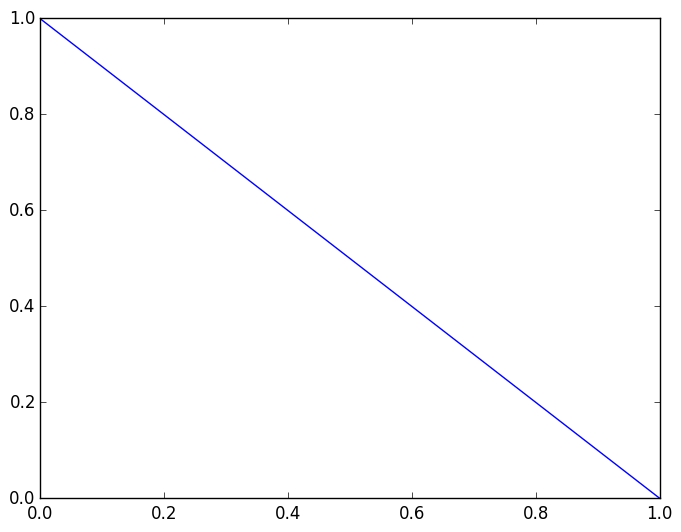

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000018CC0748>

In [41]:
plot(H,Posterior)

In [44]:
function CoinProblem(Data) #Data vector containts the observations
    H= [0:0.001:1...] # Hypothesis for the wight of the coin 
    perior= 1 
    
    r= sum(Data)
    n= length(Data)
    Likelihood= H.^r .* (1 .- H).^(n-r)
    Posterior= Likelihood .* perior
    
    return H, Posterior
end

CoinProblem (generic function with 1 method)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"w",0.5,0.0:0.05:1.0)

Interact.Slider{Int64}([Reactive.Input{Int64}] 650,"n",650,1:1300)

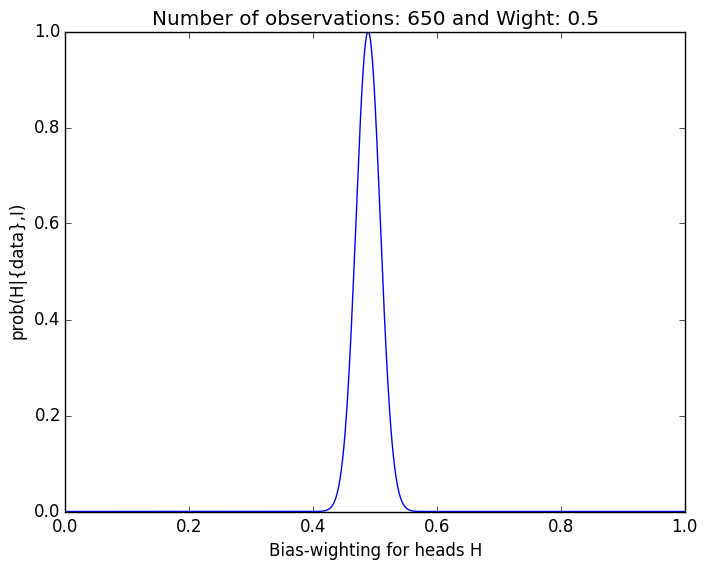

In [66]:
#Plot Configurations
f= figure()
@manipulate for w= 0:0.05:1, n=1:1300  ;withfig(f) do
        Data= Observations(w,n)
        H, Posterior= CoinProblem(Data)
        plot(H,Posterior/maximum(Posterior))
        xlabel("Bias-wighting for heads H")
        ylabel("prob(H|{data},I)")
        title("Number of observations: $n and Wight: $w")
        
    end
end